In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext version_information
%version_information numpy, dlib, matplotlib, imageio, gaze, torch, torchvision

Software,Version
Python,3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython,7.0.1
OS,Darwin 18.0.0 x86_64 i386 64bit
numpy,1.15.2
dlib,19.16.0
matplotlib,3.0.0
imageio,2.4.1
gaze,The 'gaze' distribution was not found and is required by the application
torch,0.4.1
torchvision,0.2.1


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

## running the model

In [4]:
from gaze import init
args = init(no_cuda=True, verbose=1)
print('Parameters=', args)

Parameters= {'dataset_folder': 'dataset', 'dataset_faces_folder': 'dataset_faces', 'batch_size': 8, 'test_batch_size': 1, 'size_test_set': 0.2, 'epochs': 40, 'do_adam': False, 'lr': 0.025, 'momentum': 0.05, 'no_cuda': True, 'num_processes': 1, 'seed': 42, 'log_interval': 0, 'fullsize': 75, 'crop': 64, 'size': 64, 'mean': 0.4, 'std': 0.3, 'conv1_dim': 9, 'conv1_kernel_size': 18, 'conv2_dim': 36, 'conv2_kernel_size': 14, 'conv1_bn_momentum': 0.9, 'conv2_bn_momentum': 0.9, 'dense_bn_momentum': 0.9, 'stride1': 2, 'stride2': 4, 'N_cv': 4, 'dimension': 30, 'verbose': 1}


In [5]:
from gaze import Data
d = Data(args)
d.dataset.classes

Found 2014 sample images;  1612  to train 402 to test


['blink', 'center', 'left', 'right']

In [6]:
targets = {}
s_target = '🔴'
s_fixat = '🔵'
s_distra = '🌫'
s_blink = '☠️'

N_dis = 30 # <<<<<<<<<<<< change to adapt to your notebook's width
N_margin = 2

targets['left'] = N_margin * s_distra + s_target + 2 * N_dis * s_distra + N_margin * s_distra

targets['blink'] = N_margin * s_distra + N_dis * s_distra + s_blink + N_dis * s_distra + N_margin * s_distra

targets['center'] = N_margin * s_distra + N_dis * s_distra + s_target + N_dis * s_distra + N_margin * s_distra

targets['right'] = N_margin * s_distra + 2 * N_dis * s_distra + s_target + N_margin * s_distra

print ('Empty line')
null = N_margin * s_distra +  (2 * N_dis + 1) * s_distra + N_margin * s_distra
print (null)
print ('Fixation dot')
center = N_margin * s_distra + N_dis * s_distra + s_fixat + N_dis * s_distra + N_margin * s_distra
print (center)

for label in targets.keys():
    print('label=', label)
    print (targets[label])

Empty line
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
Fixation dot
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔵🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= left
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= blink
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫☠️🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= center
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= right
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫


# dynamical test : offline detection

In [7]:
import numpy as np
from LeCheapEyeTracker.EyeTrackerServer import Server
#from LeCheapEyeTracker.EyeTrackerClient import Client
from IPython.display import clear_output

/Users/laurentperrinet/research/LeCheapEyeTracker/src/LeCheapEyeTracker/haarcascade_frontalface_default.xml


In [8]:
def grab(classes, N_frame=32, startup_time=1., interframe_time=0.3, random=False, display=False):
    try:
        import time
        time.sleep(startup_time)
        et = Server()
        frame = et.cam.grab()[:, :, ::-1]
        N_X, N_Y, three = frame.shape

        frames = []
        labels = []
        timings_frame = []
        
        N_classes = len(classes)
        timings_cv = []
        i_choice_old = 42
        
        T0 = time.time()
        for i in range(N_frame):
            try:
                t0 = time.time()
                frames.append(et.cam.grab()[:, :, ::-1])
                timings_frame.append(time.time()-T0)
                t1 = time.time()
                timings_cv.append(t1-t0)
                
                if display:
                    plt.imshow(frames[i, ...])
                    plt.show() 
                else:
                    # presentation of stimulus
                    if random:
                        i_choice = np.random.randint(N_classes)
                    else:
                        i_choice = (i // int(N_frame/N_classes) + 1) % N_classes
                    #label = list(targets.keys())[i_choice]
                    label = classes[i_choice]
                    labels.append(label)
                    if not i_choice == i_choice_old:
                        clear_output()
                        print(null)
                        print(null)
                        print(targets[label])
                        print(null)
                        print(null)                    
                        i_choice_old = i_choice

            except Exception as e:
                print(e)
            time.sleep(interframe_time)            
    finally:
        et.close()
        
    for timings, label in [(timings_cv, 'openCV')] :
        timings = np.array(timings)*1000
        print('For', label, ', timings in ms = %.3f' % timings.mean(), '+/- %.3f' % timings.std()) 

    return frames, labels, timings_frame
        

In [9]:
filename = '/tmp/dump_frames.pkl'
import os
import pickle

In [10]:
try:
    with open(filename, "rb") as f:
        dic = pickle.load(f)
        frames = dic['frames']
        labels = dic['labels']
        timings_frame = dic['timings_frame']
except:
    frames, labels, timings_frame = grab(d.dataset.classes, 
                                         N_frame=200, startup_time=1., interframe_time=0., display=False)        
    with open(filename, "wb") as f:
        pickle.dump({'frames':frames, 'labels':labels, 'timings_frame':timings_frame}, f)
    
print('len(frames)=', len(frames))
print('frames[0].shape=', frames[0].shape)
print('timings_frame[:10]=', timings_frame[:10])
print('timings_frame[-10:]=', timings_frame[-10:])

len(frames)= 200
frames[0].shape= (480, 640, 3)
timings_frame[:10]= [0.06694626808166504, 0.15369915962219238, 0.24228525161743164, 0.33193230628967285, 0.4058973789215088, 0.4933462142944336, 0.5717661380767822, 0.6604912281036377, 0.7374284267425537, 0.8259913921356201]
timings_frame[-10:]= [15.899439334869385, 15.98871922492981, 16.065667152404785, 16.155076265335083, 16.23355722427368, 16.323066234588623, 16.39961814880371, 16.48927116394043, 16.56708312034607, 16.65637230873108]


In [11]:
#!rm {filename}

In [12]:
def extract_faces(frames, do_bbox_once=False, display=False):
    from gaze import FaceExtractor
    F = FaceExtractor()
    import time
    timings_dlib = []

    N_frame  = len(frames)
    N_X, N_Y, three = frames[0].shape
    from PIL import Image

    img_faces = []
    bbox = F.get_bbox(frames[0]) if do_bbox_once else None
    
    for i in range(N_frame):
        if display:
            plt.imshow(frames[i]/255)
            plt.show() 
        t0 = time.time()
        try:
            img_face = F.face_extractor(frames[i], bbox=bbox)
        except:
            print('No face in frame#', i)
        img_faces.append(img_face)
        t1 = time.time()
        timings_dlib.append(t1-t0)
        if display:
            plt.imshow(img_face)
            plt.show() 
        
    for timings, label in [(timings_dlib, 'Dlib')] :
        timings = np.array(timings)*1000
        print('For', label, ', timings in ms =', timings.mean(), '+/-', timings.std()) 

    return img_faces

img_faces = extract_faces(frames)

For Dlib , timings in ms = 151.72860741615295 +/- 16.14848342473729


In [20]:
from gaze import ML
ml = ML(args)
path = '_Regard.pt'
path = '_Regard_400.pt'
ml.train(path=path)

Found 1992 sample images;  1594  to train 398 to test
Loading file _Regard_400.pt


In [21]:
def dyn_test(img_faces, labels, display=False, verbose=False):
    import time
    from PIL import Image
    timings_torch = []
    preds = []
    for img_face, label in zip(img_faces, labels) :
        t0 = time.time()
        pred = ml.classify(img_face, ml.dataset.test_transform)
        t1 = time.time()
        timings_torch.append(t1-t0)
        preds.append(pred)    
        pred_label = ml.dataset.dataset.classes[pred.argmax()]
        if verbose: print('Prediction =', pred_label, 'Shown label =', label)
        if display:
            plt.imshow(img_face)
            plt.show() 

    for timings, label in [(timings_torch, 'torch')] :
        timings = np.array(timings)*1000
        print('For', label, ', timings in ms =', timings.mean(), '+/-', timings.std()) 
    return np.array(preds)
        
preds = dyn_test(img_faces, labels, display=False)

For torch , timings in ms = 9.246389865875244 +/- 2.89867275436401


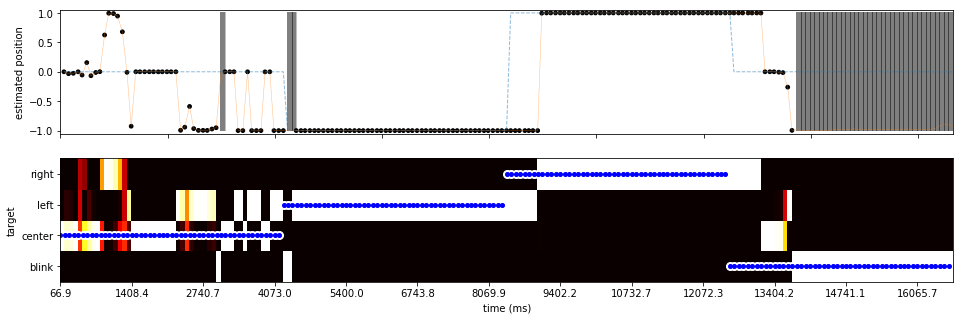

In [22]:
fig, axs = plt.subplots(2, 1, figsize=((16, 5)))
ax = axs[0]
x_label = np.array([-(l == 'left')  + (l == 'right') for l in labels])
ax.plot(np.array(timings_frame)*1000, x_label, '--', lw=1, alpha=.5)
p_b, p_c, p_l, p_r = preds[:, 0], preds[:, 1], preds[:, 2], preds[:, 3]
ax.pcolor(np.array(timings_frame)*1000, np.array([-1, 1]), p_b[None,:], cmap=plt.get_cmap('binary'), alpha=.5)
x_pred = 2 / np.pi * np.arctan2(p_r-p_l, p_c)
#h_pred = (preds * np.log(preds)).sum(axis=1) / np.log(4)
ax.plot(np.array(timings_frame)*1000, x_pred, lw=.5, alpha=.5)
ax.scatter(np.array(timings_frame)*1000, x_pred, 14*(1-p_b), color='k')
ax.set_xticklabels([])
ax.set_ylabel('estimated position')
ax.set_xlim(0, np.array(timings_frame).max()*1000 )
ax.set_ylim(-1.05, 1.05)
ax = axs[1]
ax.pcolor(preds.T, cmap=plt.hot())
label_num = [1*(l == 'center') + 2*(l == 'left')  + 3*(l == 'right') for l in labels]
ax.plot(np.array(label_num)+.5, 'wo', ms=8)
ax.plot(np.array(label_num)+.5, 'bo', ms=4)
ax.set_xlabel('time (ms)')
ax.set_ylabel('target')
ax.set_yticks(.5+np.arange(len(ml.dataset.dataset.classes)))
ax.set_yticklabels(ml.dataset.dataset.classes)
N_frame = len(timings_frame)
ax.set_xticks(np.arange(0, N_frame, N_frame//12))
ax.set_xticklabels(['%.1f' % (timings_frame[int(i_f)]*1000) for i_f in  ax.get_xticks()])
#ax.legend(loc='best')
#plt.show() 

fname = 'figures/timing'
for ext in ['.pdf', '.png']:
    plt.savefig(fname + ext)

In [16]:
toto

NameError: name 'toto' is not defined

# dynamical test : online detection

In [ ]:
def dyn_test(N_frame=32, startup_time=1., interframe_time=0., display=False):
    try:
        from gaze import FaceExtractor
        F = FaceExtractor()
        t = ml.dataset.transform

        import time
        time.sleep(startup_time)
        et = Server()
        timings_cv = []
        timings_dlib = []
        timings_torch = []
        
        for i in range(N_frame):            

            t0 = time.time()
            try:
                t0 = time.time()
                frame = et.cam.grab()[:, :, ::-1]
                t1 = time.time()
                timings_cv.append(t1-t0)
                t0 = time.time()
                img_face = F.face_extractor(frame)
                t1 = time.time()
                timings_dlib.append(t1-t0)
                t0 = time.time()
                pred = classify(img_face, t)
                t1 = time.time()
                timings_torch.append(t1-t0)
                label = ml.dataset.dataset.classes[pred.argmax()]
                if display:
                    plt.imshow(img_face)
                    plt.show() 
                    print('Prediction =', label)
                else:
                    clear_output()
                    print(null)
                    print(null)
                    print(targets[label])
                    print(null)
                    print(null)                    

                print('Elapsed time =', '%0.3f' % ((time.time()-t0)*1000), 'ms')
                    
            except Exception as e:
                print(e)
            time.sleep(interframe_time)
            
    finally:
        et.close()
        
    for timings, label in [(timings_cv, 'openCV'), (timings_dlib, 'Dlib'), (timings_torch, 'torch')] :
        timings = np.array(timings)*1000
        print('For', label, ', timings in ms =', timings.mean(), '+/-', timings.std()) 
        
dyn_test(display=False, interframe_time=1.)        

In [ ]:
dyn_test(N_frame=8, display=False, interframe_time=0.)

In [ ]:
dyn_test(N_frame=8, display=True, interframe_time=0.)